In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import PIL
import PIL.Image
import pathlib
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
from  IPython import display
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import shutil

In [2]:
data_dir = "./archive/"
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*/*.jpeg')))
print(image_count)

5856


In [4]:
image_train_count = len(list(data_dir.glob('train/*/*.jpeg')))
print(image_train_count)

5216


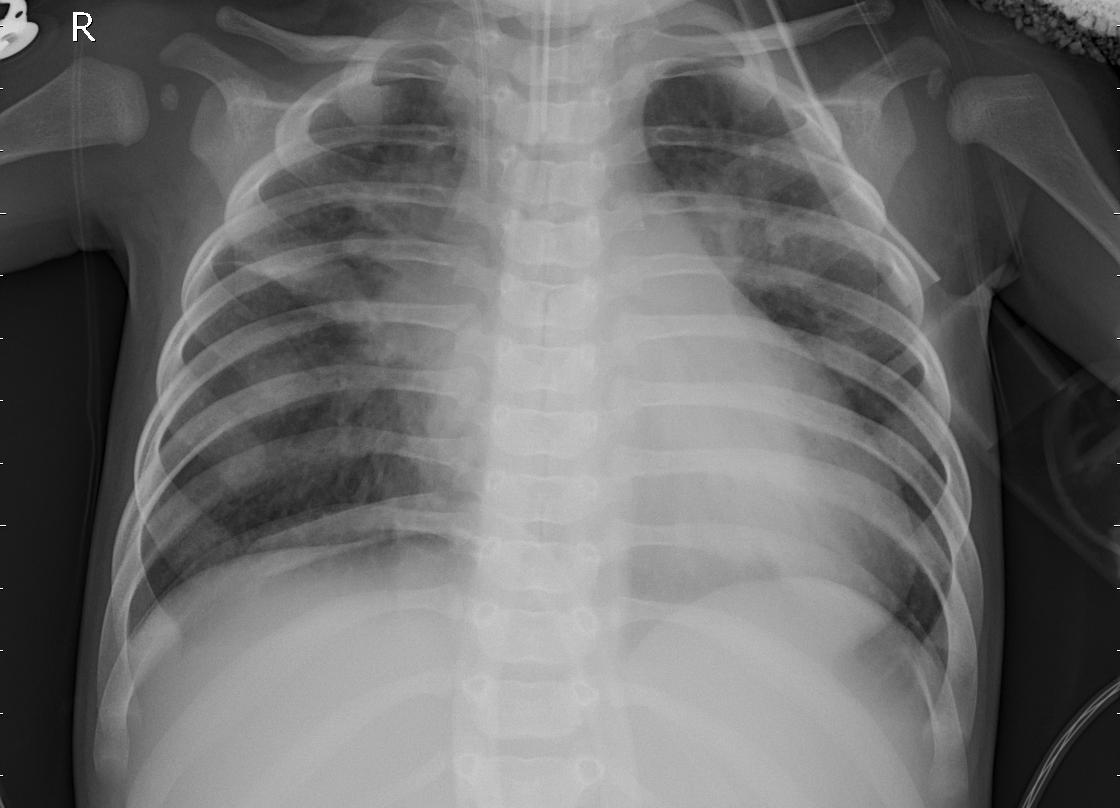

In [5]:
view_image = list(data_dir.glob('test/pneumonia/*'))
PIL.Image.open(str(view_image[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = pathlib.Path('./archive/train/')
test_ds = pathlib.Path('./archive/test/')
val_ds = pathlib.Path('./archive/val/')

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_ds,
    image_size=(img_height, img_width),
    batch_size= batch_size
)

Found 5216 files belonging to 2 classes.


In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_ds,
    image_size=(img_height, img_width),
    batch_size= batch_size
)

Found 624 files belonging to 2 classes.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_ds,
    image_size= (img_height, img_width),
    batch_size= batch_size
)

Found 16 files belonging to 2 classes.


In [12]:
class_names = train_ds.class_names
class_names

['normal', 'pneumonia']

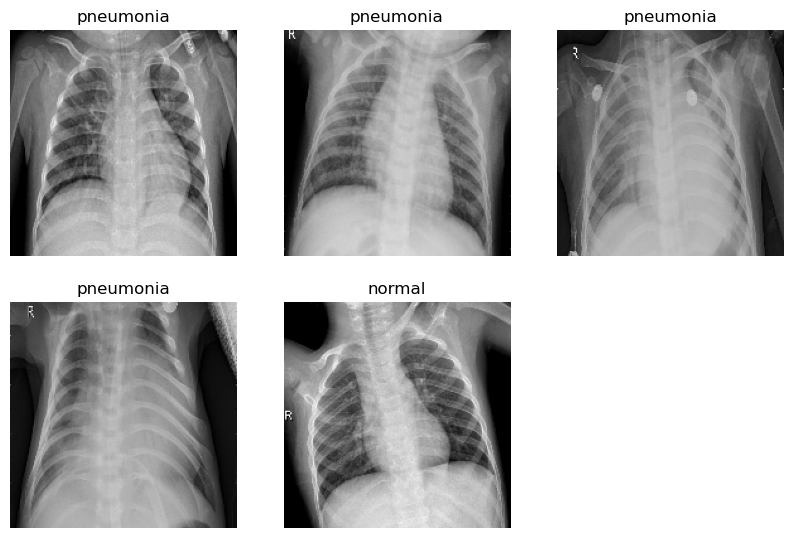

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
    for i in range(5):
        ax = plt.subplot (3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [14]:
normalization = tf.keras.layers.Rescaling(1./255)

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization(x), y))

In [17]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [24]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [25]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=3
)

Epoch 1/3
163/163 [==============================] - 34s 208ms/step - loss: 0.0830 - accuracy: 0.9699 - val_loss: 0.9823 - val_accuracy: 0.8109
Epoch 2/3
163/163 [==============================] - 34s 208ms/step - loss: 0.0627 - accuracy: 0.9741 - val_loss: 1.1028 - val_accuracy: 0.7965
Epoch 3/3
163/163 [==============================] - 35s 214ms/step - loss: 0.0499 - accuracy: 0.9795 - val_loss: 1.2789 - val_accuracy: 0.7692


In [33]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('Accuracy: ', test_acc)

20/20 - 1s - loss: 1.2789 - accuracy: 0.7692 - 952ms/epoch - 48ms/step
Accuracy:  0.7692307829856873


In [136]:
predictions = model.predict(val_ds)

1/1 [==============================] - 0s 73ms/step


In [41]:
np.argmax(predictions[14])

1

In [ ]:
# Realizando previsão de uma imagem específica

In [49]:
from PIL import Image

In [121]:
img = Image.open('./imagem/pneumo.jpeg')


In [122]:
desired = (180,180)
resized = img.resize(desired)

In [123]:
norm = np.array(resized) / 255.1

In [124]:
imput_data = np.expand_dims(norm, axis=0)

In [125]:
predict_imf = model.predict(imput_data)

1/1 [==============================] - 0s 23ms/step


In [126]:
print(predict_imf)

[[-2.812149    0.47757003]]


In [127]:
np.argmax(predict_imf[0])

1